### Preprocessing by prof m (TL;DR)

In [110]:
concernPolls = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/covid-19-polls/master/covid_concern_polls.csv")

def avgConcern(d):
    return pd.Series({"very":np.mean(d["very"])})
avgConcernPolls = concernPolls.groupby(["end_date"]).apply( avgConcern )

avgConcernPolls = avgConcernPolls.reset_index()
avgConcernPolls["end_date"] = pd.to_datetime(avgConcernPolls.end_date)

### Data intro

The (super awesome) media outlet [FiveThirtyEight](https://fivethirtyeight.com/) collected data on the US population's concern that they, or a family member, would be impact negatively by the novel coronavirus.
The article is [here](https://projects.fivethirtyeight.com/coronavirus-polls/). 

FiveThirtyEight often, if not always, keeps an opensource repository of all the data they use in their stories. 
The data repo link is [here](https://data.fivethirtyeight.com/) and the data we are going to analyze on COVID-19 concerns can be found [here](https://github.com/fivethirtyeight/covid-19-polls).

The raw data has the date a poll was opened, ended, the number of people polled, the sponsor of the poll, and the percentage of those who were "not at all","not very", "somewhat","very" concerned about the spread/impact of COVID-19.
Our analysis will explore when more than 50% percent of people polled were very concerned about COVID-19. 

To start (TL;DR code above), prof m downloaded the data and averaged the percent of people very concerned over pools on ending on the same day.  

### Ploting the percent very concerned  about COVID-19 over time

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669., 737699.]), <a list of 9 Text major ticklabel objects>)

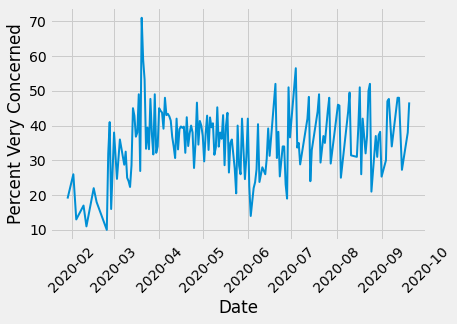

In [111]:
# Plot the percentage of polled americans that report feeling Very concerned about COVID-19. 
plt.style.use("fivethirtyeight")

fig,ax = plt.subplots()
ax.plot( avgConcernPolls.end_date, avgConcernPolls.very,lw=2 )

ax.set_xlabel("Date")
ax.set_ylabel("Percent Very Concerned")

plt.xticks(rotation=45)

### Defining a Bernoulli-distributed random variable to represent those >50% very concerned. 

In [112]:
# Define a Bernoulli r.v. that track when americans feel more than 50% concerned. 
veryConcerned = list(avgConcernPolls.very.values)

moreThan50=0
moreThan50Concerned = []
for very in veryConcerned:
    if very > 50.:
        moreThan50=1
    else:
        moreThan50=0
    moreThan50Concerned.append(moreThan50)

### A plot of >50% very concerned over time. 

Text(0, 0.5, 'More than 50% very concerned')

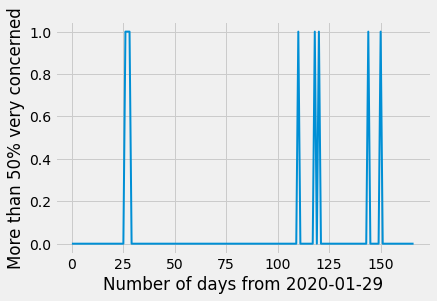

In [113]:
fig,ax = plt.subplots()
ax.plot( moreThan50Concerned, lw=2. )

ax.set_xlabel("Number of days from 2020-01-29")
ax.set_ylabel("More than 50% very concerned")

In [114]:
# Count the proportion of "1s"
import numpy as np # import the (very handy) numpy module

prop = np.mean( moreThan50Concerned ) # a shortcut using the numpy module
print("Prop of 1s = {:.2f}".format(prop))

Prop of 1s = 0.05


### Estimated R.V.

From our dataset, it looks like a reasonable estimate of our Bernoulli-distributed variable (let's say $V$ for very concerned) is the following:

\begin{align}
    V \sim \text{Bern} \left( 0.05 \right)
\end{align}

We can use this estimate random variable to simulate other potential datasets we could have observed. 

### Simulate a polling time period

In [115]:
# simulate a single polling period with bernoulli variables

numberOfDays = len(veryConcerned) # compute the length of a list
simulatedRVS = []

for sim in range(numberOfDays):
    simulatedRV = np.random.binomial(1,prop) # A Bernoulli r.v. with prob equal to the variable prop (0.05)
    simulatedRVS.append(simulatedRV)

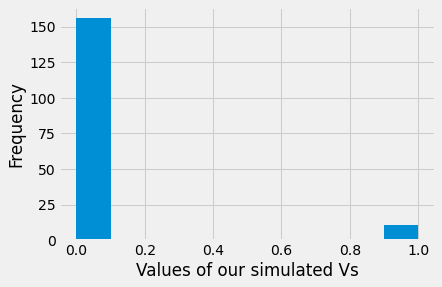

In [116]:
# plot a histogram
fig,ax = plt.subplots()
ax.hist(simulatedRVS)

ax.set_xlabel("Values of our simulated Vs")
ax.set_ylabel("Frequency")

plt.show()

### Simulating many potential futures (A brief intro to Monte Carlo estimation)

In [117]:
# simulate many different scenarios
def simulateConcern(veryConcerned,p):
    numberOfDays = len(veryConcerned)

    simulatedRVS = []
    
    for sim in range(numberOfDays):
        simulatedRV = np.random.binomial(1,p)
        simulatedRVS.append(simulatedRV)
    return simulatedRVS

propOfConcern = []
for i in range(5*10**3):
    onesAndZeros = simulateConcern(veryConcerned,prop)
    estProp = np.mean(onesAndZeros)
    propOfConcern.append(estProp)

Text(0, 0.5, 'Count')

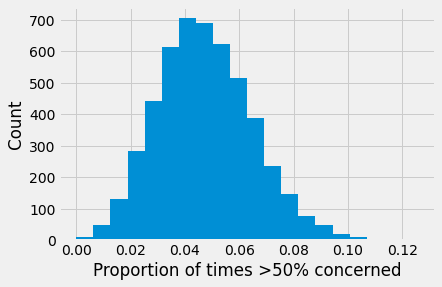

In [118]:
fig,ax = plt.subplots()
ax.hist( propOfConcern,20 )

ax.set_xlabel("Proportion of times >50% concerned")
ax.set_ylabel("Count")